## Importing basic required modules

In [146]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

Loading data

Data is collected from a third party open source, data tuple is for each day from 30 Aug 21 to 30 Aug 22.

In [147]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('test.csv')

train = train.Close
valid = valid.Close

Feature selection and feature scaling

In [148]:
sc = MinMaxScaler(feature_range=(0,1))
train = sc.fit_transform(train.values.reshape(-1,1))
valid = sc.transform(valid.values.reshape(-1,1))

Based on past 10 days data of close value we will predict next day's close price

In [149]:
time_intervals_to_train = 10
prediction_interval = 1
                                       
x_train = []
y_train = []

for i in range(time_intervals_to_train, len(train) - prediction_interval):
    x_train.append(train[i - time_intervals_to_train: i, 0])
    y_train.append(train[i + prediction_interval, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [150]:
x_train.shape

(189, 10, 1)

In [151]:
y_train.shape

(189,)

In [152]:
x_valid = []
y_valid = []

for i in range(time_intervals_to_train, len(valid) - prediction_interval):
    x_valid.append(valid[i - time_intervals_to_train: i, 0])
    y_valid.append(valid[i + prediction_interval, 0])

x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

x_valid = np.reshape(x_valid, (x_valid.shape[0], x_valid.shape[1], 1))
x_valid.shape

(39, 10, 1)

In [153]:
y_valid.shape

(39,)

## Model

In [154]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [174]:
model = Sequential()

model.add(LSTM(128, return_sequences= True, input_shape = (x_train.shape[1], 1), activation = 'relu'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences= True, activation = 'relu'))
model.add(Dropout(0.2))
model.add(LSTM(32, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'mean_squared_error', optimizer= 'adam', metrics= ['accuracy'])

model.fit(x_train, y_train, epochs=200, batch_size= 8,verbose=0)

In [175]:
y_pred = model.predict(x_valid)

In [179]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_valid,y_pred)

0.07415678528531902

Accuracy in graphical manner

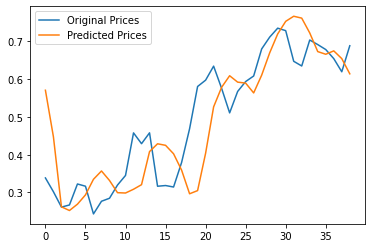

In [176]:
plt.plot(y_valid, label = 'Original Prices')
plt.plot(y_pred, label = 'Predicted Prices')
plt.legend()
plt.show()

## Predicting seven days prices

In [177]:
valid = pd.read_csv('test.csv').Close
valid = sc.transform(valid.values.reshape(-1,1))
prediction = list()

for i in range(7):
    
    n = np.append(valid, np.array(prediction))
    n = n.reshape(-1,1)
    x_n = []

    for i in range(time_intervals_to_train, len(n) - prediction_interval):
        x_n.append(n[i - time_intervals_to_train: i, 0])

    x_n = np.array(x_n)

    x_n = np.reshape(x_n, (x_n.shape[0], x_n.shape[1], 1))


    prediction.append(model.predict(np.reshape(np.array(x_n[len(x_n) - time_intervals_to_train : len(x_n) +1, 0]), (1, -1, 1)))[0][0])
    

## Prediction for next seven days

In [178]:
prediction = sc.inverse_transform(np.array(prediction).reshape(-1,1))
prediction

array([[2656.2305],
       [2675.7356],
       [2683.6162],
       [2680.698 ],
       [2657.7825],
       [2628.871 ],
       [2624.757 ]], dtype=float32)